<a href="https://colab.research.google.com/github/mvlier/topapprox/blob/develop/Interactive_Tutorial_topapprox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the latest topapprox package

This may take around a minute.

In [ ]:
!pip install git+https://github.com/mvlier/topapprox@main

In [ ]:
# we need to install additional packages for some examples
!pip install -U -q cripser persim

# Tutorial

Import the package.

In [1]:
import topapprox as ta

Import other necessary packages for this tutorial.

In [2]:
import cripser, persim
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = False
import warnings
warnings.filterwarnings("ignore")

##  Toy example with a 1D signal

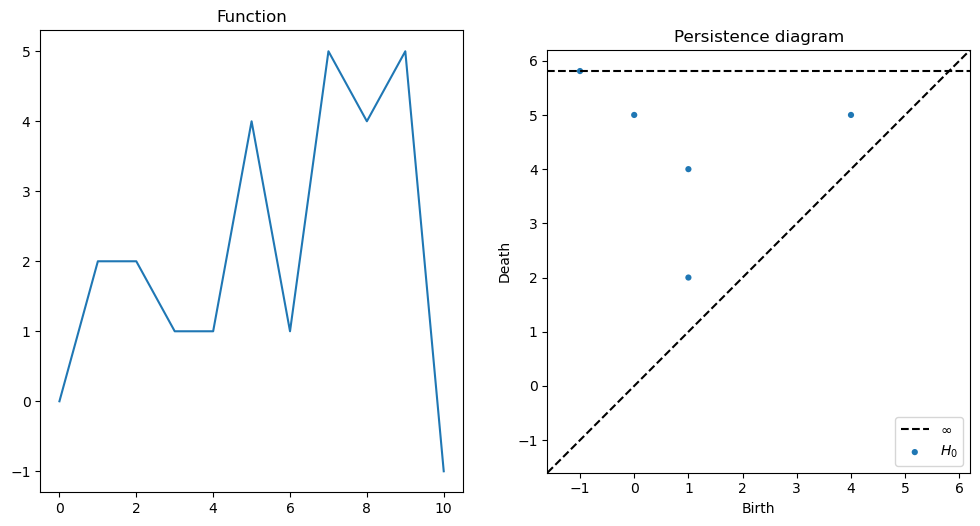

In [3]:
# Define some artificial 1D array
img = np.array([[0,2,2,1,1,4,1,5,4,5,-1]])

def plot_1d_with_pers(img, *, epsilon=0):
    '''Function for plotting 1D image with persistence diagram'''
    plt.close("all")
    fig, ax = plt.subplots(1, 2, figsize=(12,6))

    # Plotting the function on the left
    ax[0].plot(img.ravel())
    ax[0].set_title("Function")

    # Computing and plotting the diagram on the right
    pd = cripser.computePH(img, maxdim=0)
    pd = pd[:,1:3]
    persim.plot_diagrams(pd, ax=ax[1])
    ax[1].set_title("Persistence diagram")
    if epsilon:
        ax[1].plot([-100,100], [-100+epsilon,100+epsilon], '--', linewidth=0.5, c="r")

plot_1d_with_pers(img)

In [4]:
# Create the class before applying the filter
uf = ta.TopologicalFilterImage(img)

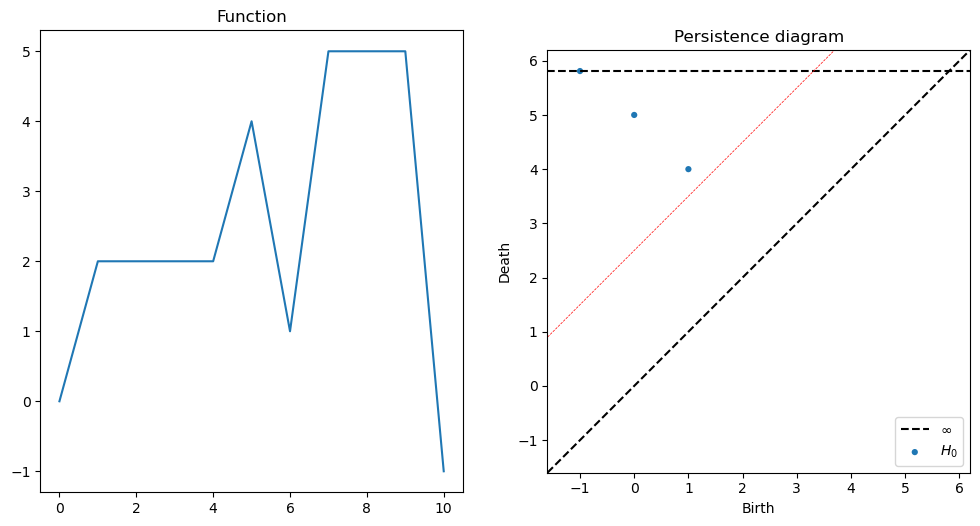

In [5]:
# Perform the filtering with threshold
epsilon = 2.5
img_filtered = uf.low_pers_filter(epsilon)

# PLOTTING WITH PERSISTENCE DIAGRAM
plot_1d_with_pers(img_filtered, epsilon=epsilon)


In [6]:
# regions associated with parents
uf.get_persistence(reduced=False)

array([[ 1.,  2.,  4.,  2.,  2.],
       [ 1.,  4.,  6.,  5.,  1.],
       [ 4.,  5.,  8.,  7.,  1.],
       [ 0.,  5.,  0.,  9., 10.],
       [-1., inf, 10., -1., inf]])

In [7]:
# regions associated with parents
parent, linking_vertex, root, children = uf.get_BHT(with_children=True)
print(f"Parents: {parent}")
print(f"Linking_vertex: {linking_vertex}")
print(f"Root: {root}")
print(f"Children: {children}")

Parents: [10  0  0  4  0  0  0  0  0  0 10]
Linking_vertex: [ 9  1  2  4  2  5  5  7  7  9 -1]
Root: 10
Children: [[1, 2, 4, 5, 6, 7, 8, 9], [], [], [], [3], [], [], [], [], [], [0]]


## 1D example with basin size filtering

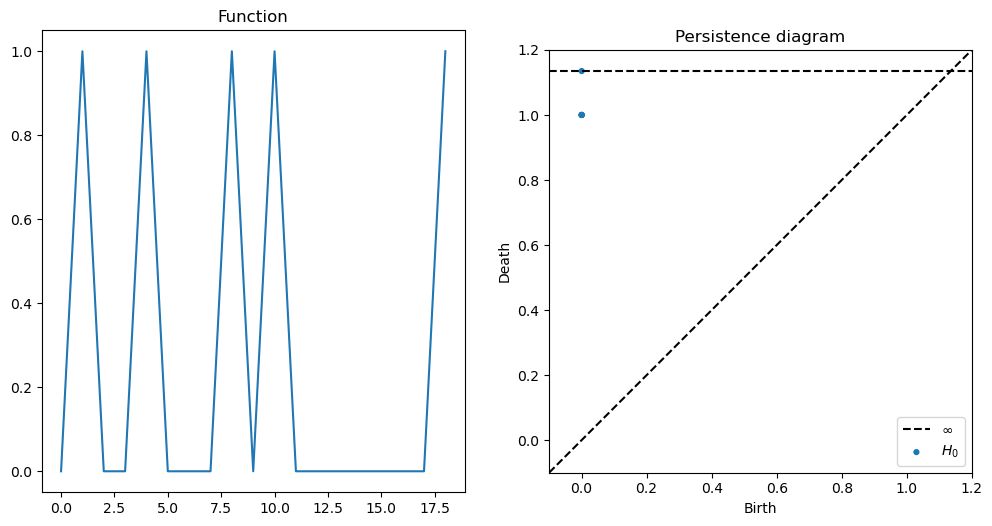

In [8]:
# Define some artificial 1D array
img = np.array([[0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1]])

plot_1d_with_pers(img)

In [9]:
# Create the class before applying the filter
uf = ta.TopologicalFilterImage(img)

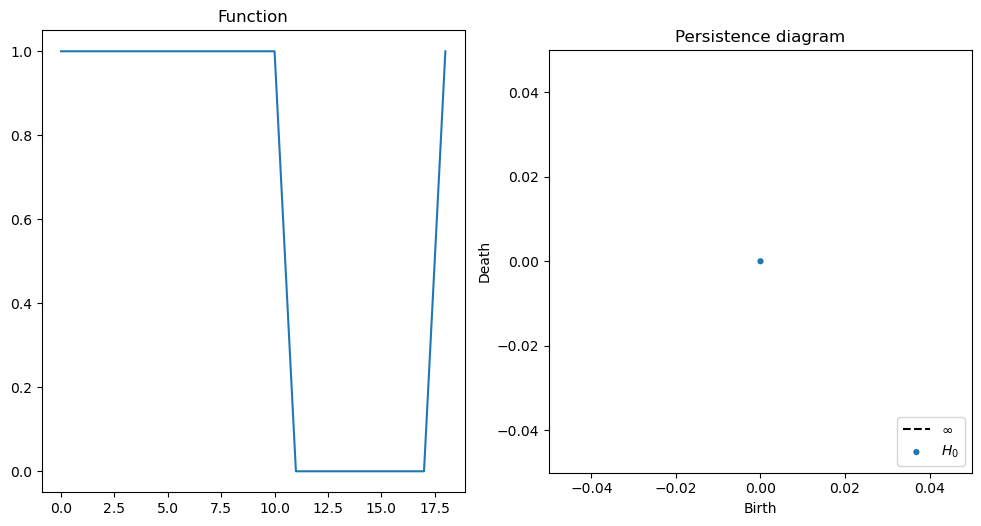

In [10]:
# Perform the filtering with threshold
epsilon = 2
size_gap = [0,11]
img_filtered = uf.low_pers_filter(epsilon, size_gap=size_gap)

# PLOTTING WITH PERSISTENCE DIAGRAM
plot_1d_with_pers(img_filtered, epsilon=epsilon)


In [11]:
# regions associated with parents
uf.get_persistence(reduced=False)

array([[ 0.,  1.,  7.,  8.,  3.],
       [ 0.,  1.,  3.,  4.,  2.],
       [ 0.,  1.,  0.,  1.,  2.],
       [ 0.,  1.,  9., 10., 11.],
       [ 0., inf, 17., -1., inf]])

In [12]:
# regions associated with parents
parent, linking_vertex, root, children = uf.get_BHT(with_children=True)
print(f"Parents: {parent}")
print(f"Linking_vertex: {linking_vertex}")
print(f"Root: {root}")
print(f"Children: {children}")

Parents: [ 9  0  3  9  9  6  7  9  9 17  9 17 16 16 16 16 17 17 17]
Linking_vertex: [ 1  1  3  4  4  6  7  8  8 10 10 12 13 14 15 16 17 -1 18]
Root: 17
Children: [[1], [], [], [2], [], [], [5], [6], [], [8, 10, 7, 4, 3, 0], [], [], [], [], [], [], [15, 14, 13, 12], [16, 11, 9, 18], []]


##  Toy example with a 2D image

We can construct an image by setting the values of each pixel as follows.

In [13]:
img = np.array([[0, 5, 3],\
                [5,6,4],\
                [2, 5, 1]])

We can visualize the image together with its persistence diagram as follows:

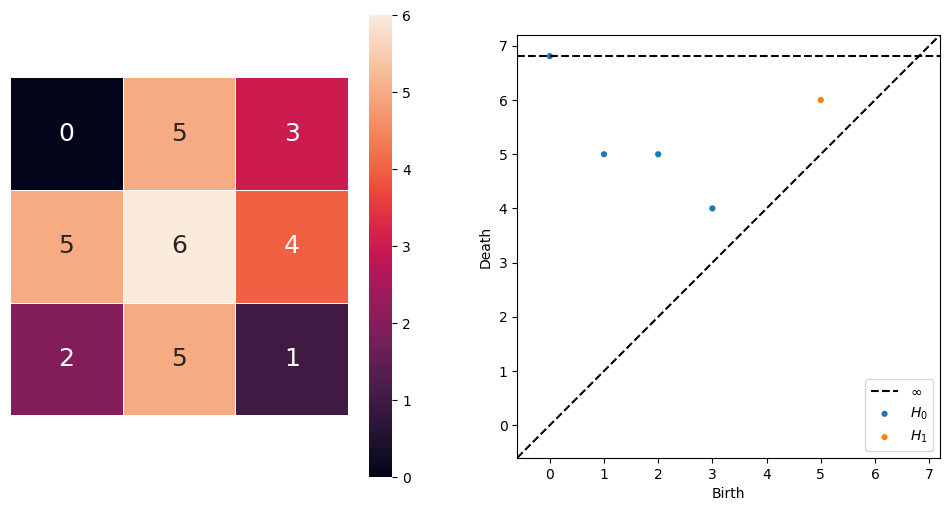

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# plotting image on the left
sns.heatmap(img, annot=True, linewidths=0.5, square=True, yticklabels=False, xticklabels=False, annot_kws={"fontsize":18}, ax=ax[0])

# computing persistence diagram with cubical ripser
pd = cripser.computePH(img)
pd = [pd[pd[:,0]==i,1:3] for i in range(2)] # separate only [birth, death] pairs
persim.plot_diagrams(pd, ax=ax[1])


### PH0: 0-dimensional

Next, we apply the 0 Low Persistence Filter (LPF) with threshold $\epsilon=2$:

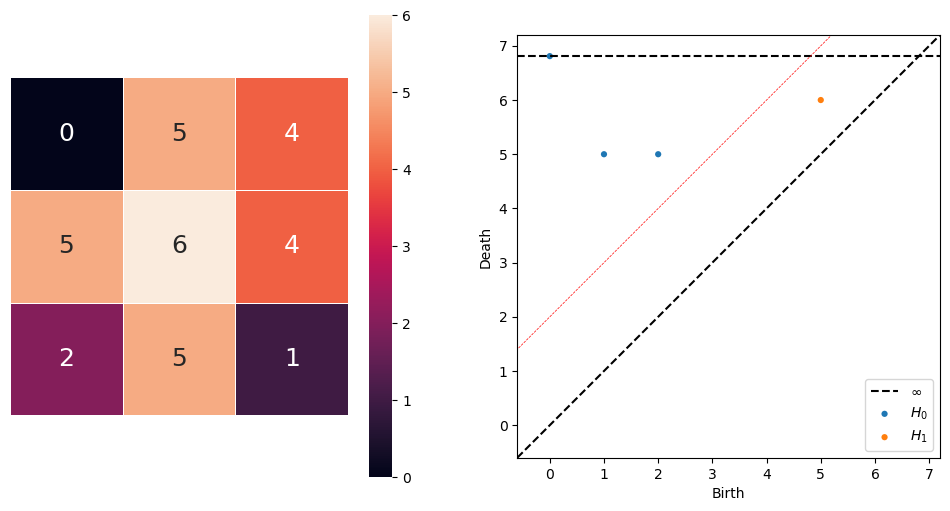

In [15]:
# thresholf value
eps = 2

# Filtering 0-homology classes with persistence less than 2
uf = ta.TopologicalFilterImage(img, dual=False)
img_filtered = uf.low_pers_filter(eps)

# Colsing preview plot (to prevent memory overload)
plt.close('all')

# Plotting filtered verison
fig, ax = plt.subplots(1, 2, figsize=(12,6))
# image on the left
sns.heatmap(img_filtered, annot=True, linewidths=0.5, square=True, yticklabels=False, xticklabels=False, annot_kws={"fontsize":18}, ax=ax[0])

# computing persistence diagram with cubical ripser
pd = cripser.computePH(img_filtered)
pd = [pd[pd[:,0]==i,1:3] for i in range(2)] # separate only [birth, death] pairs
# Plotting diagram on the right
persim.plot_diagrams(pd, ax=ax[1])
ax[1].plot([-100,100], [-100+eps,100+eps], '--', linewidth=0.5, c="r")
plt.show()

In [16]:
# regions associated with parents
parent, linking_vertex, root, children = uf.get_BHT(with_children=True)
print(f"Parents: {parent}")
print(f"Linking_vertex: {linking_vertex}")
print(f"Root: {root}")
print(f"Children: {children}")

Parents: [0 0 8 0 0 2 0 0 0]
Linking_vertex: [-1  1  5  3  4  5  3  7  1]
Root: 0
Children: [[3, 6, 1, 7, 8, 4], [], [5], [], [], [], [], [], [2]]


We can see in the image above that the lowest $0$-homology interval was eliminated.\
In the code cell above if we change `eps` to `3.5` and `4.5` we can see the result of filtering the middle interval and all the intervals, respectively.

We can see that `uf.persistence` has the $0$-homology persistence diagram of the original image `img`. 
More precisely, `uf.persistence` is a numpy array of shape `(n, 3)`, with `n` being the number of intervals in the diagram, and each triple is given by `[birth, death, birth_location]`, in which birth and death are simply the birth and death values, and birth_location is the pixel location of the initial generator of that interval (this location is given as an index for the flattened image, so in a 3x3 image as above, index 6 corresponds to position (2, 0)).

In [19]:
uf.get_persistence(reduced=False)

array([[ 3.,  4.,  2.,  5.,  2.],
       [ 2.,  5.,  6.,  3.,  1.],
       [ 1.,  5.,  8.,  1.,  3.],
       [ 0., inf,  0., -1., inf]])

## PH1: 1-dimensional

We can do the same thing as above but for $1$-homology, by simply intializing the `TopologicalFilterImage` class with the keyword argument `dual=True`.

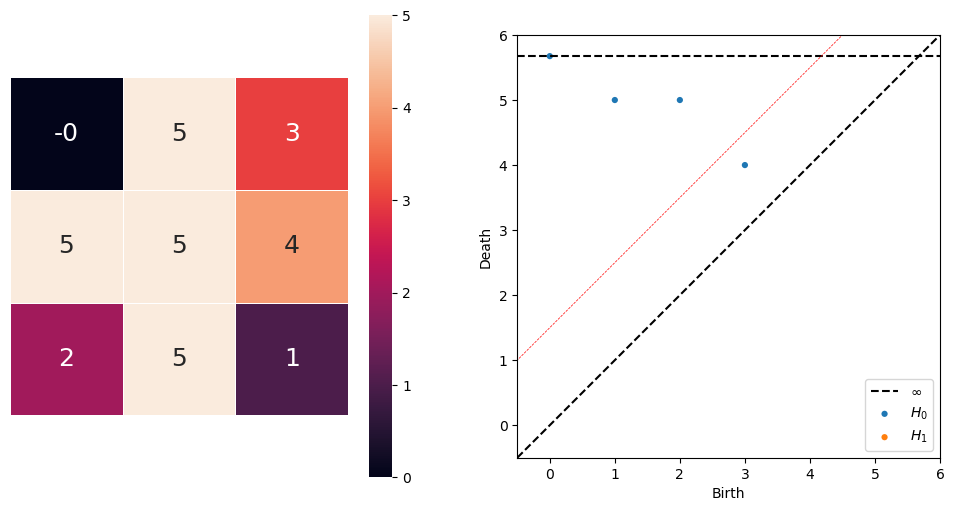

In [21]:
# thresholf value
eps = 1.5

# Filtering 0-homology classes with persistence less than 2
uf_dual = ta.TopologicalFilterImage(img, dual=True)
img_filtered1 = uf_dual.low_pers_filter(eps)

# Colsing preview plot (to prevent memory overload)
plt.close('all')

# Plotting filtered verison
fig, ax = plt.subplots(1, 2, figsize=(12,6))
# image on the left
sns.heatmap(img_filtered1, annot=True, linewidths=0.5, square=True, yticklabels=False, xticklabels=False, annot_kws={"fontsize":18}, ax=ax[0])

# computing persistence diagram with cubical ripser
pd = cripser.computePH(img_filtered1)
pd = [pd[pd[:,0]==i,1:3] for i in range(2)] # separate only [birth, death] pairs
# Plotting diagram on the right
persim.plot_diagrams(pd, ax=ax[1])
ax[1].plot([-100,100], [-100+eps,100+eps], '--', linewidth=0.5, c="r")
plt.show()

In [22]:
# regions associated with parents
parent, linking_vertex, root, children = uf_dual.get_BHT(with_children=True)
print(f"Parents: {parent}")
print(f"Linking_vertex: {linking_vertex}")
print(f"Root: {root}")
print(f"Children: {children}")

Parents: [9 4 9 9 9 9 9 9 9 9]
Linking_vertex: [ 0  1  2  1  1  5  6  7  8 -1]
Root: 9
Children: [[], [], [], [], [1], [], [], [], [], [7, 4, 3, 5, 2, 6, 8, 0]]


In [23]:
uf_dual.get_persistence()

array([[-6., -5.,  4.,  1.,  2.]])

## Example with a real image

In [76]:
import urllib
import os

# download image
download_url = "https://github.com/mvlier/topapprox/raw/main/Paper%20examples/pagoda.npy"
fn = "pagoda.npy"
if not os.path.isfile(fn):
    urllib.request.urlretrieve(download_url, fn)

img = np.load(fn)

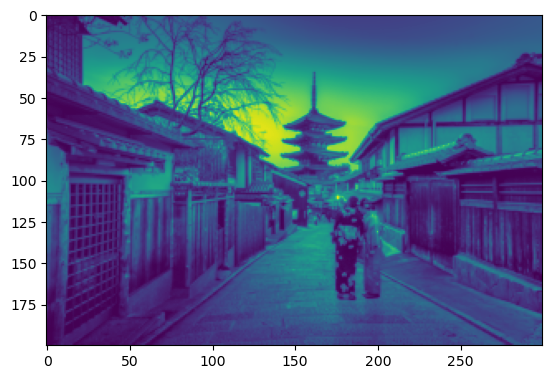

In [84]:
from skimage.transform import rescale, resize, downscale_local_mean
import skimage
from tqdm.auto import tqdm
import cripser, persim
plt.rcParams['text.usetex'] = False

n,m = 200,300
img = resize(img,(n,m))
plt.imshow(img)

100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


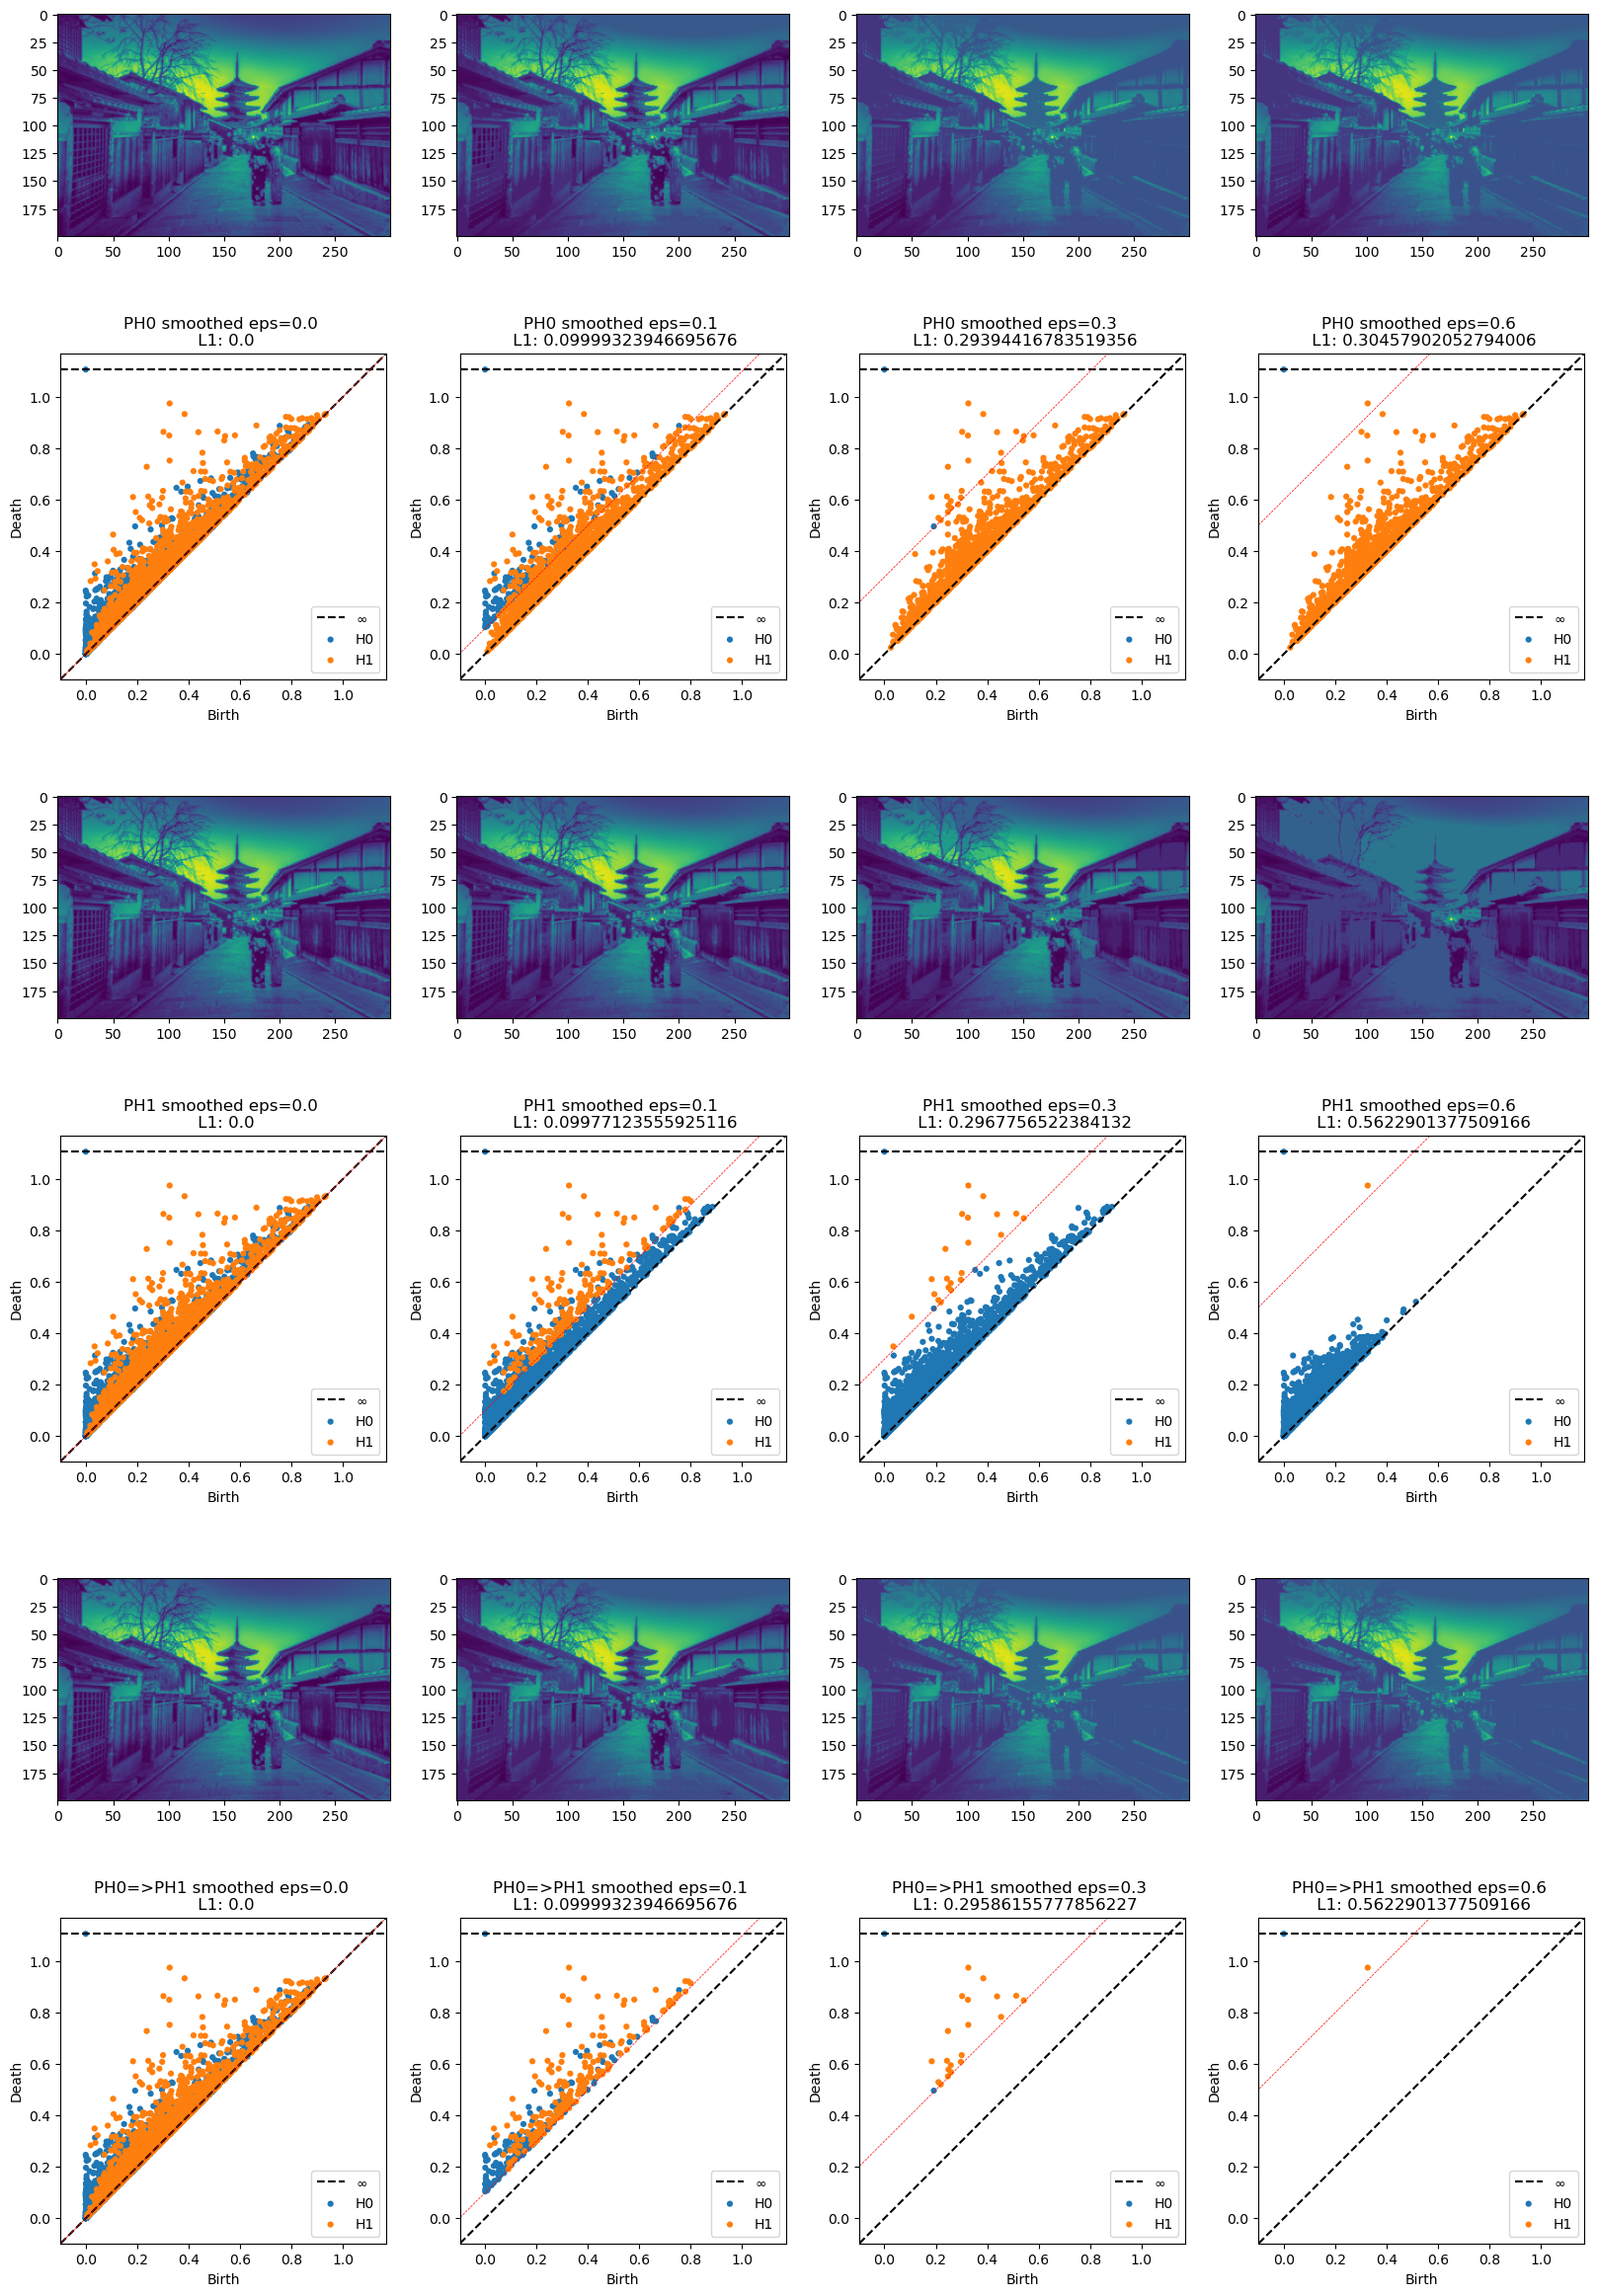

In [85]:
# filtering with different thresholds

thresholds=[0.0,0.1,0.3,0.6] # filtering thresholds
PD_original = cripser.computePH(img)
PD_original = [PD_original[PD_original[:,0]==i,1:3] for i in range(2)]

fig, axs = plt.subplots(6,len(thresholds),figsize=(20,30))
smoothed={}
smoothed1={}
smoothed2={}
a=ta.TopologicalFilterImage(img)
b=ta.TopologicalFilterImage(img, dual=True)
for i,s in enumerate(tqdm(thresholds)):
  PD_cutoff = [PD_original[i][PD_original[i][:,1]-PD_original[i][:,0]>=s] for i in range(2)]

  # PH0 smoothing
  smoothed[s] =a.low_pers_filter(epsilon=s)
  axs[0,i].imshow(smoothed[s])
  PD_smoothed = cripser.computePH(smoothed[s])
  PD_smoothed = [PD_smoothed[PD_smoothed[:,0]==i,1:3] for i in range(2)]
  PD_smoothed_cutoff = [PD_smoothed[i][PD_smoothed[i][:,1]-PD_smoothed[i][:,0]>=s] for i in range(2)]
  persim.plot_diagrams(PD_smoothed,labels=["H0","H1"],ax=axs[1,i])
  axs[1,i].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
  axs[1,i].set_title(f'PH0 smoothed eps={s} \n L1: {np.max(np.abs(smoothed[s]-img))}')# \n distance PH0: {persim.bottleneck(PD_smoothed[0],PD_cutoff[0])}\n PH1: {persim.bottleneck(PD_smoothed_cutoff[1],PD_cutoff[1])}')

  # PH1 smoothing
  smoothed1[s] =b.low_pers_filter(epsilon=s)
  axs[2,i].imshow(smoothed1[s])
  PD_smoothed = cripser.computePH(smoothed1[s])
  PD_smoothed = [PD_smoothed[PD_smoothed[:,0]==i,1:3] for i in range(2)]
  PD_smoothed_cutoff = [PD_smoothed[i][PD_smoothed[i][:,1]-PD_smoothed[i][:,0]>=s] for i in range(2)]
  persim.plot_diagrams(PD_smoothed,labels=["H0","H1"],ax=axs[3,i])
  axs[3,i].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
  axs[3,i].set_title(f'PH1 smoothed eps={s} \n L1: {np.max(np.abs(smoothed1[s]-img))}')# \n distance PH0: {persim.bottleneck(PD_smoothed[0],PD_cutoff[0])}\n PH1: {persim.bottleneck(PD_smoothed_cutoff[1],PD_cutoff[1])}')

  # PH0 => PH1 smoothing
  c=ta.TopologicalFilterImage(smoothed[s],dual=True)
  smoothed2[s] = c.low_pers_filter(epsilon=s)
  axs[4,i].imshow(smoothed[s])
  PD_smoothed = cripser.computePH(smoothed2[s])
  PD_smoothed = [PD_smoothed[PD_smoothed[:,0]==i,1:3] for i in range(2)]
  persim.plot_diagrams(PD_smoothed,labels=["H0","H1"],ax=axs[5,i])
  axs[5,i].set_title(f'PH0=>PH1 smoothed eps={s} \n L1: {np.max(np.abs(smoothed2[s]-img))}')# \n distance PH0: {persim.bottleneck(PD_smoothed[0],PD_cutoff[0])} \n PH1: {persim.bottleneck(PD_smoothed[1],PD_cutoff[1])}')
  axs[5,i].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")


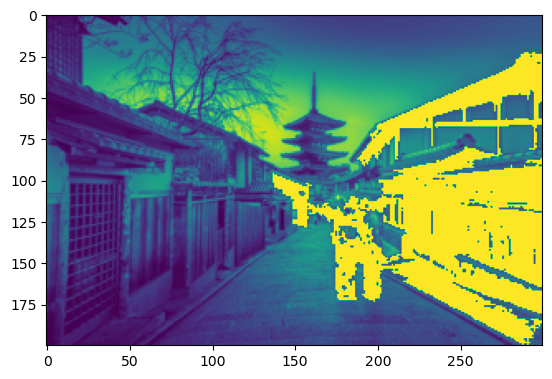

In [86]:
pds = a.get_persistence()
sorted_index = np.argsort(pds[:,4])
pds = pds[sorted_index]

imgg = img.copy()
for i in range(1,2):
    vert = int(pds[-i][2])
    idxs = np.unravel_index(a.bht.get_descendants(vert), img.shape)

    imgg[idxs] = 1

plt.imshow(imgg)

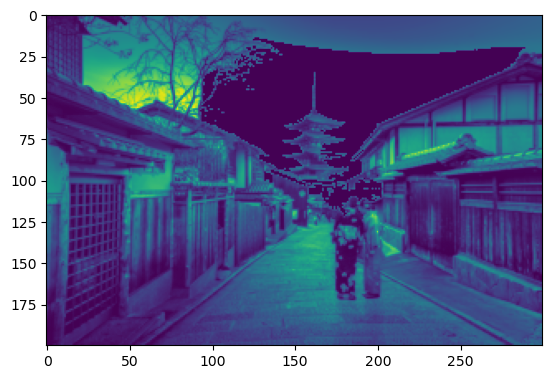

In [87]:
pds = b.get_persistence()
sorted_index = np.argsort(pds[:,4])
pds = pds[sorted_index]

imgg = img.copy()
for i in range(1,2):
    vert = int(pds[-i][2])
    idxs = np.unravel_index(b.bht.get_descendants(vert), img.shape)

    imgg[idxs] = 0

plt.imshow(imgg)

In [6]:
n,m = 800,800
img = resize(skimage.data.camera(),(n,m))
dual = False
thresholds=[0.0,0.1,0.3,0.6] # filtering thresholds

%time tf = ta.TopologicalFilterImage(img, dual=dual)
%time tf2 = ta.TopologicalFilterImage(img, dual=dual)
for i,s in enumerate(thresholds):
    print("\nepsilon",s)
    print("Compute persistence everytime")
    %time u = tf.low_pers_filter(s, keep_basin=False)
    print("Re-use persistence")
    %time v = tf2.low_pers_filter(s, keep_basin=True)
    #print(np.allclose(u,v))

CPU times: user 3.26 s, sys: 110 ms, total: 3.37 s
Wall time: 3.41 s
CPU times: user 3.29 s, sys: 129 ms, total: 3.42 s
Wall time: 3.44 s

epsilon 0.0
Compute persistence everytime
CPU times: user 115 ms, sys: 11.8 ms, total: 127 ms
Wall time: 127 ms
Re-use persistence
CPU times: user 178 ms, sys: 11.8 ms, total: 190 ms
Wall time: 190 ms

epsilon 0.1
Compute persistence everytime
CPU times: user 116 ms, sys: 7.77 ms, total: 124 ms
Wall time: 124 ms
Re-use persistence
CPU times: user 42.9 ms, sys: 774 µs, total: 43.7 ms
Wall time: 43.8 ms

epsilon 0.3
Compute persistence everytime
CPU times: user 117 ms, sys: 9.06 ms, total: 126 ms
Wall time: 126 ms
Re-use persistence
CPU times: user 48.7 ms, sys: 875 µs, total: 49.6 ms
Wall time: 49.5 ms

epsilon 0.6
Compute persistence everytime
CPU times: user 117 ms, sys: 8.88 ms, total: 126 ms
Wall time: 126 ms
Re-use persistence
CPU times: user 49.6 ms, sys: 1.2 ms, total: 50.8 ms
Wall time: 50.6 ms


## Toy example with a planar graph

In [14]:
# TODO: more meaningful example
G=ta.TopologicalFilterGraph()
f={0:2, 1:1.5, 2:1, 3:1, 4:1, 5:2, 6:4, 7:3}
G.from_faces_nonfaces(F=[(0,1,2,3)],nF=[(1,2,4,3,0),(2,4,3)],filtration=f)
print(G.compute())
print(G.compute(dual=True))


[[ 1. inf]]
[[-inf  -1.]]


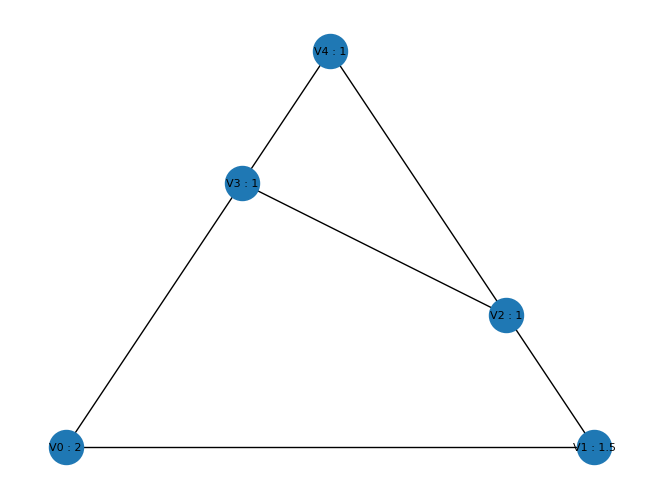

In [15]:
G.draw(with_labels=True,with_filtration=True)

## Image is a grid graph

In [17]:
from skimage.transform import rescale, resize, downscale_local_mean
import skimage

n,m = 150,100
img = resize(skimage.data.camera(),(n,m))

G=ta.TopologicalFilterGraph()
%time G.from_array(img)
%time v=G.compute()


CPU times: user 2.87 s, sys: 94.6 ms, total: 2.96 s
Wall time: 3 s
CPU times: user 199 ms, sys: 5.23 ms, total: 204 ms
Wall time: 204 ms
